In [1]:
from prophet import Prophet
import pandas as pd

In [2]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\wovenbottom-uk.xlsx")


In [3]:
d

,TREND,BASE,START_DATE,FSI,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,MARKDOWN_INDEX,FASHION_LEADERS_INDEX,TRENDING_INDEX,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION
0,Woven Bottoms Super Woven Bottoms Uk,Apparel,2016-01-04,0.051615,0.044249,0.051120,0.053082,0.055081,0.043994,0.046538,...,1.055511,0.361415,0.835343,0.049535,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK
1,Woven Bottoms Super Woven Bottoms Uk,Apparel,2016-01-11,0.054251,0.045303,0.050803,0.052825,0.054956,0.044593,0.047079,...,1.052338,0.364038,0.862297,0.056747,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK
2,Woven Bottoms Super Woven Bottoms Uk,Apparel,2016-01-18,0.053100,0.046362,0.050422,0.052338,0.054426,0.045009,0.047715,...,1.049306,0.366635,0.886658,0.071070,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK
3,Woven Bottoms Super Woven Bottoms Uk,Apparel,2016-01-25,0.052723,0.047406,0.049500,0.051751,0.053739,0.045743,0.048400,...,1.046416,0.369204,0.908424,0.079953,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK
4,Woven Bottoms Super Woven Bottoms Uk,Apparel,2016-02-01,0.052344,0.048416,0.049047,0.051221,0.053275,0.046533,0.049078,...,1.043667,0.371747,0.927596,0.088837,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Woven Bottoms Super Woven Bottoms Uk,Apparel,2022-06-27,NaN,NaN,0.051258,0.054691,0.058208,0.043985,0.047208,...,NaN,NaN,NaN,0.000000,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK
339,Woven Bottoms Super Woven Bottoms Uk,Apparel,2022-07-04,NaN,NaN,0.051202,0.054782,0.057999,0.043980,0.047384,...,NaN,NaN,NaN,0.000000,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK
340,Woven Bottoms Super Woven Bottoms Uk,Apparel,2022-07-11,NaN,NaN,0.051320,0.054932,0.058406,0.044033,0.047491,...,NaN,NaN,NaN,0.000000,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK
341,Woven Bottoms Super Woven Bottoms Uk,Apparel,2022-07-18,NaN,NaN,0.051273,0.055101,0.058804,0.043894,0.047545,...,NaN,NaN,NaN,0.000000,"['2016-01-11', '2019-06-10']","['2017-03-27', '2018-10-29']",2021-09-07 11:57:10.382,camillereyes,Super Category,UK


In [4]:
d=d.iloc[:, [2,3]]

In [5]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-5-ec1e916fc466>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= pd.to_datetime(df['ds'])


In [6]:
df

,ds,y
0,2016-01-04,0.051615
1,2016-01-11,0.054251
2,2016-01-18,0.053100
3,2016-01-25,0.052723
4,2016-02-01,0.052344
...,...,...
286,2021-06-28,0.057330
287,2021-07-05,0.057315
288,2021-07-12,0.057253
289,2021-07-19,0.057381


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


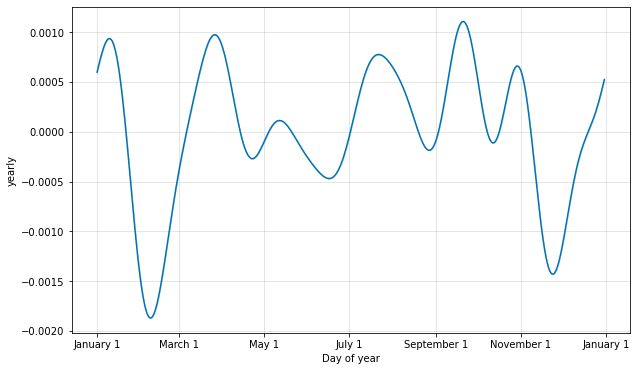

In [7]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


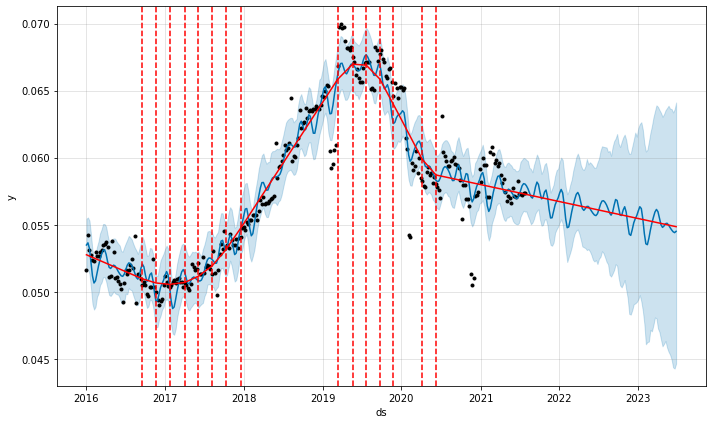

In [8]:
from prophet.plot import add_changepoints_to_plot
m = Prophet()
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


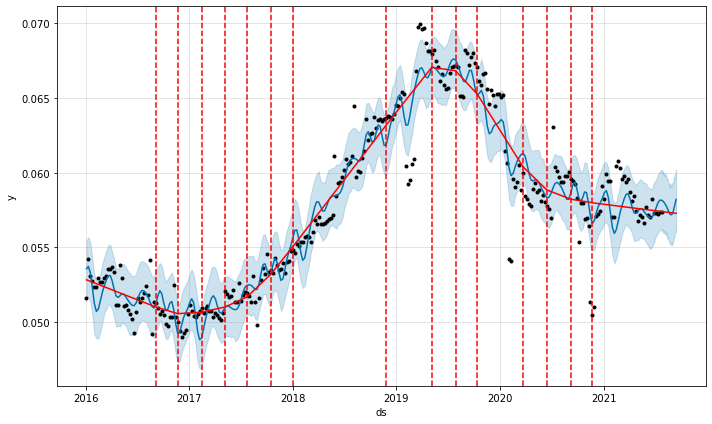

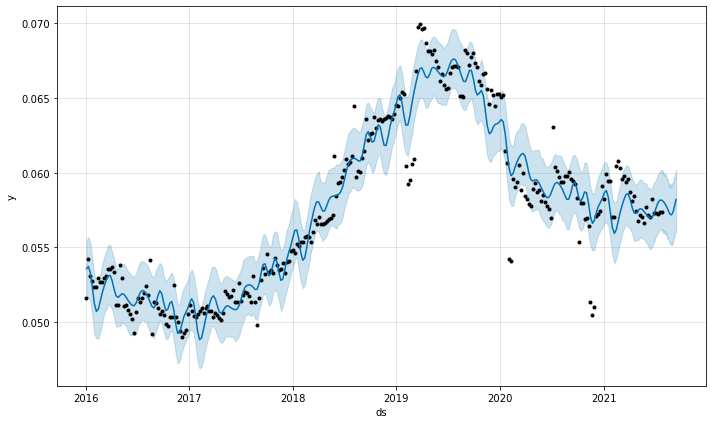

In [9]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.05, growth='linear')
# define the model
# fit the model
m.fit(df)

future = m.make_future_dataframe(periods=50)
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
fig = m.plot(fcst)

In [10]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,0.052836,0.051685,0.055470,0.052836,0.052836,0.000743,0.000743,0.000743,0.000743,0.000743,0.000743,0.0,0.0,0.0,0.053579
1,2016-01-11,0.052784,0.051723,0.055689,0.052784,0.052784,0.000943,0.000943,0.000943,0.000943,0.000943,0.000943,0.0,0.0,0.0,0.053727
2,2016-01-18,0.052732,0.051361,0.055296,0.052732,0.052732,0.000565,0.000565,0.000565,0.000565,0.000565,0.000565,0.0,0.0,0.0,0.053297
3,2016-01-25,0.052680,0.050440,0.054257,0.052680,0.052680,-0.000380,-0.000380,-0.000380,-0.000380,-0.000380,-0.000380,0.0,0.0,0.0,0.052299
4,2016-02-01,0.052627,0.049200,0.053145,0.052627,0.052627,-0.001383,-0.001383,-0.001383,-0.001383,-0.001383,-0.001383,0.0,0.0,0.0,0.051245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2021-09-10,0.057294,0.056077,0.059924,0.057213,0.057356,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.0,0.0,0.0,0.057903
337,2021-09-11,0.057291,0.056060,0.059959,0.057206,0.057357,0.000695,0.000695,0.000695,0.000695,0.000695,0.000695,0.0,0.0,0.0,0.057986
338,2021-09-12,0.057289,0.055987,0.059950,0.057199,0.057358,0.000778,0.000778,0.000778,0.000778,0.000778,0.000778,0.0,0.0,0.0,0.058067
339,2021-09-13,0.057287,0.056216,0.060150,0.057190,0.057357,0.000858,0.000858,0.000858,0.000858,0.000858,0.000858,0.0,0.0,0.0,0.058144


In [11]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 6 forecasts with cutoffs between 2018-02-07 00:00:00 and 2020-07-26 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.000016,0.004043,0.003237,0.054607,0.048367,0.052890,0.225806
1,37 days,0.000016,0.004031,0.003182,0.053681,0.048367,0.051949,0.258065
2,39 days,0.000015,0.003920,0.003030,0.051143,0.043201,0.049527,0.290323
3,40 days,0.000015,0.003905,0.002971,0.050271,0.043201,0.048667,0.322581
4,41 days,0.000016,0.003957,0.003085,0.052146,0.048367,0.050488,0.290323


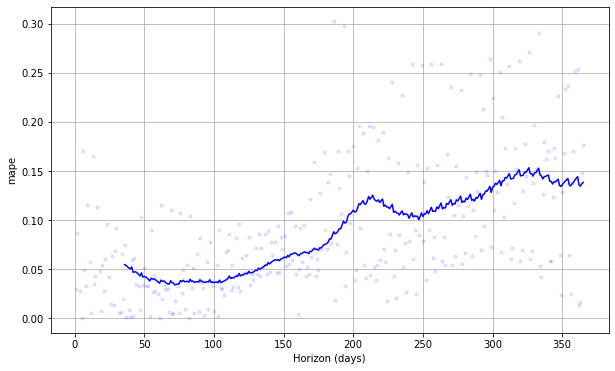

In [13]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
